<center>
<img src="https://imgs.xkcd.com/comics/convincing.png" height="200"> 

# Андан на экономе: домашнее задание 1
</center>


**ФИО:** Мамонтова Дарья Андреевна

**id из контеста:** -



## Часть 2: парадоксальная

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon
import random

### Задача 1 (Парадокс инспектора)

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведите $10^4$ экспериментов и с их помощью:

__а) [5 баллов]__ Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже ли визуально распределение на нормальное?

__б) [10 баллов]__ Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__в) [10 баллов]__ Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

__г) [10 баллов]__ Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

__Пояснения:__ первый автобус можно не включать в выборку, Пумбу за пассажира можно не считать. 

### **Пункт а**

Text(0.5, 1.0, 'Распределение количества автобусов, \n отошедших от станции за сутки')

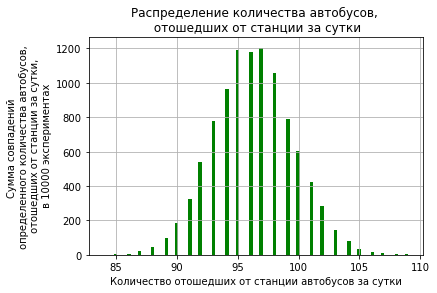

In [2]:
# источник - семинарская тетрадка
np.random.seed(123456789)
def intervals(minutes=720):
    chastota = 0
    while minutes > 0:
        chastota += 1 
        minutes -= np.random.choice([5,10], p = [0.5,0.5])
    return chastota
itog = []
for i in range(10000):
    bus = intervals()
    itog.append(bus)
plt.grid(True)
plt.hist(itog,90,color = 'green')
plt.xlabel('Количество отошедших от станции автобусов за сутки')
plt.ylabel('Сумма совпадений \n определенного количества автобусов, \n отошедших от станции за сутки,\n в 10000 экспериментах')
plt.title('Распределение количества автобусов, \n отошедших от станции за сутки')
            

#### ***Глядя на график, мы можем заметить, что распределение количества автобусов, отошедших от станции за сутки, визуально похоже на график функции плотности нормального распределения***

### **Пункт б**

Text(0.5, 1.0, 'Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Тимоном')

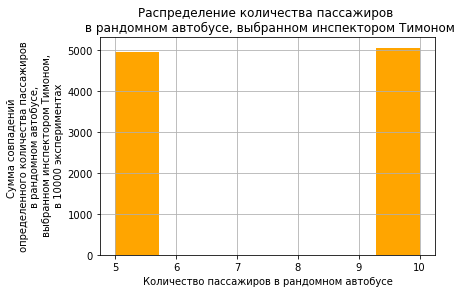

In [3]:
#источник - семинарская тетрадка
np.random.seed(123456789)
def people(passazhiri = 0):
    passazhiri = np.random.choice([5,10], p = [0.5,0.5])
    return passazhiri
ludi = []
for j in range(10000):
    ppl = people()
    ludi.append(ppl)
plt.grid(True)
plt.hist(ludi,7,color = 'orange')
plt.xlabel('Количество пассажиров в рандомном автобусе')
plt.ylabel('Сумма совпадений \n определенного количества пассажиров \n в рандомном автобусе, \n выбранном инспектором Тимоном,\n в 10000 экспериментах')
plt.title('Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Тимоном')

#### ***Из графика можно понять, что в целом количество пассажиров в рандомном автобусе из интервала [5;6)  почти равновероятно количеству пассажиров в рандомном автобусе из интервала (9;10]***

#### **Оценим математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном:**

In [4]:
E= np.mean([people() for q in range(10000)])
print(f'Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равно {E}')

Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равно 7.486


#### **Теперь оценим дисперсию количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном:**

In [5]:
Var = np.var([people() for q in range(10000)])
print(f'Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равна {Var}')

Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равна 6.249423999999999


### **Пункт в**

Text(0.5, 1.0, 'Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Пумбой')

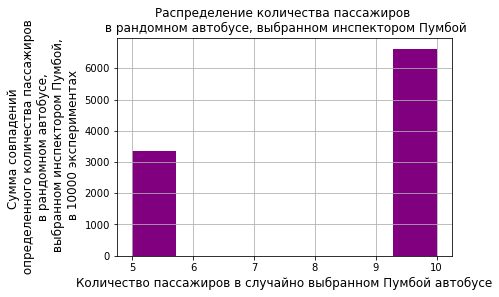

In [6]:
kolvo = 0
op =[]
for t in range(10000):
    avtobus_spisok = []
    prom = 0
    while prom<721:
        time = np.random.choice([5,10])
        avtobus_spisok.append((prom,prom+time))
        prom += time
    zhdem = np.random.randint(0,721)
    yt = []
    for w in range(len(avtobus_spisok)):
        if zhdem>=avtobus_spisok[w][0] and zhdem<avtobus_spisok[w][1]:
            yt.append(avtobus_spisok[w])
            c = yt[0]
    kolvo = c[1]-c[0]
    op.append(kolvo)
plt.grid(True)
plt.hist(op,7,color = 'purple') 
plt.xlabel('Количество пассажиров в случайно выбранном Пумбой автобусе',fontsize=12)
plt.ylabel('Сумма совпадений \n определенного количества пассажиров \n в рандомном автобусе, \n выбранном инспектором Пумбой,\n в 10000 экспериментах',fontsize=12)
plt.title('Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Пумбой')

#### ***Из графика можно понять, что в целом количество пассажиров в рандомном автобусе из интервала [5;6)  менее вероятно, чем количество пассажиров в рандомном автобусе из интервала (9;10]***

#### **Оценим математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой:**

In [7]:
E= np.mean([op for q in range(10000)])
print(f'Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равно {E}')

Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равно 8.316


#### **Теперь оценим дисперсию количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой:**

In [8]:
Var = np.var([op for q in range(10000)])
print(f'Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равна {Var}')

Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равна 5.584143999999973


### **Пункт г**

### Пусть теперь время между автобусами распределено экспоненциально со средним равным 10 минутам. Посмотрим, что изменится для пункта "а": 

Text(0.5, 1.0, 'Распределение количества автобусов, \n отошедших от станции за сутки')

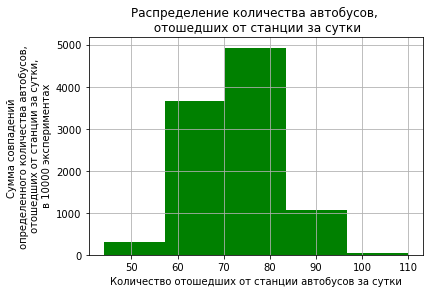

In [10]:
np.random.seed(123456789)
def intervals(minutes=720):
    chastota = 0
    while minutes > 0:
        chastota += 1 
        minutes -= expon.rvs(scale=10)
    return chastota
itog = []
for i in range(10000):
    bus = intervals()
    itog.append(bus)
plt.grid(True)
plt.hist(itog,5,color = 'green')
plt.xlabel('Количество отошедших от станции автобусов за сутки')
plt.ylabel('Сумма совпадений \n определенного количества автобусов, \n отошедших от станции за сутки,\n в 10000 экспериментах')
plt.title('Распределение количества автобусов, \n отошедших от станции за сутки')

#### ***Сравнив результаты из пункта "а", мы понимаем, что возможное количество автобусов, отошедших от станции за сутки, сократилось: до этого минимум был равен примерно 85, теперь - 63. Кроме того, разброс значений стал существенно меньше: в дискретном случае - интервал примерно от 85 до 110, в случае экспоненциального распределения - примерно от 63 до 68.***

### Теперь посмотрим, что изменится для пункта "б":

Text(0.5, 1.0, 'Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Тимоном')

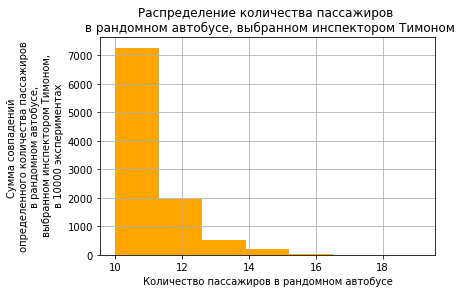

In [11]:
np.random.seed(123456789)
def people(passazhiri = 0):
    passazhiri = expon.rvs(10)
    return passazhiri
ludi = []
for j in range(10000):
    ppl = people()
    ludi.append(ppl)
plt.grid(True)
plt.hist(ludi,7,color = 'orange')
plt.xlabel('Количество пассажиров в рандомном автобусе')
plt.ylabel('Сумма совпадений \n определенного количества пассажиров \n в рандомном автобусе, \n выбранном инспектором Тимоном,\n в 10000 экспериментах')
plt.title('Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Тимоном')

#### ***Можем заметить, что в сравнении с результами из пункта "б" значительно поменялось количество пассажиров в рандомном автобусе, выбранном инспектором Тимоном. Во-первых, теперь значения лежат в интервале примерно от 10 до 17. Во-вторых, теперь рандомное количество пассажиров не почти равновероятно, так как значения от 10 до 11 значительно более вероятны, чем остальные.***

#### ***Оценим новое математическое ожидание пассажиров в рандомном автобусе, выбранном инспектором Тимоном:***

In [12]:
E= np.mean([people() for q in range(10000)])
print(f'Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равно {np.round(E,4)}')

Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равно 11.0106


#### ***Сделаем то же самое с дисперсией:***

In [13]:
Var = np.var([people() for q in range(10000)])
print(f'Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равна {np.round(Var,4)}')

Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Тимоном, равна 0.9504


#### ***В сравнении с результатами в пункте "б" математическое ожидание увеличилось, а дисперсия уменьшилась***

### Теперь для пункта "в":

Text(0.5, 1.0, 'Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Пумбой')

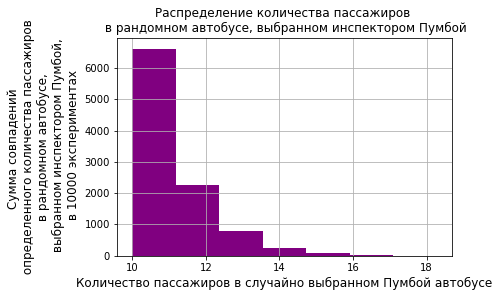

In [14]:
kolvo = 0
op =[]
for t in range(10000):
    avtobus_spisok = []
    prom = 0
    while prom<721:
        time = expon.rvs(10)
        avtobus_spisok.append((prom,prom+time))
        prom += time
    zhdem = np.random.randint(0,721)
    yt = []
    for w in range(len(avtobus_spisok)):
        if zhdem>=avtobus_spisok[w][0] and zhdem<avtobus_spisok[w][1]:
            yt.append(avtobus_spisok[w])
            c = yt[0]
    kolvo = c[1]-c[0]
    op.append(kolvo)
plt.grid(True)
plt.hist(op,7,color = 'purple') 
plt.xlabel('Количество пассажиров в случайно выбранном Пумбой автобусе',fontsize=12)
plt.ylabel('Сумма совпадений \n определенного количества пассажиров \n в рандомном автобусе, \n выбранном инспектором Пумбой,\n в 10000 экспериментах',fontsize=12)
plt.title('Распределение количества пассажиров \n в рандомном автобусе, выбранном инспектором Пумбой')

#### ***Аналогично, получаем, что в сравнении с результами из пункта "в" значительно поменялось количество пассажиров в рандомном автобусе, выбранном инспектором Пумбой. Во-первых, теперь значения лежат в интервале примерно от 10 до 17. Во-вторых, теперь значения от 10 до 11 значительно более вероятны, чем остальные***

#### ***Оценим новое математическое ожидание пассажиров в рандомном автобусе, выбранном инспектором Пумбой:***

In [15]:
E= np.mean([op for q in range(10000)])
print(f'Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равно {np.round(E,4)}')

Математическое ожидание количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равно 11.0782


#### ***Сделаем то же самое с дисперсией:***

In [16]:
Var = np.var([op for q in range(10000)])
print(f'Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равна {np.round(Var,4)}')

Дисперсия количества пассажиров в рандомном автобусе, выбранном инспектором Пумбой, равна 1.0984


#### ***В сравнении с результатами из пункта "в" можем заметить, что математическое ожидание увеличилось, а дисперсия уменьшилась***

### Задача 2 (Парадокс Хуана Мануэля Родригеса Паррондо)

У Атоса, Портоса и Арамиса по 1000 франков. Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью $0.49$ и проигрывает один франк с вероятностью $0.51$. Портос ходит в казино Б, где ситуация интереснее :) 

- Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью $0.09$ и проигрывает один франк с вероятностью $0.91$
- Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью $0.74$ и проигрывает один франк с вероятностью $0.26$

Арамис каждый раз выбирает казино А или казино Б равновероятно. Проведите $10^4$ симуляций эволюции благосостояния Атоса, Портоса и Арамиса.Каждая симуляция предусматривает $1000$ посещений казино. Все три игрока все деньги носят с собой и ни на что не тратят :)

__а) [10 баллов]__ Постройте на графике $10$ случайных траекторий изменений богатства Атоса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

__б) [10 баллов]__ Постройте на графике $10$ случайных траекторий изменений богатства Портоса, по горизонтали —  номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

__в) [10 баллов]__ Постройте на графике $10$ случайных траекторий изменений богатства Арамиса, по горизонтали — номер посещени казино, по вертикали — богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.
    

### Пункт а

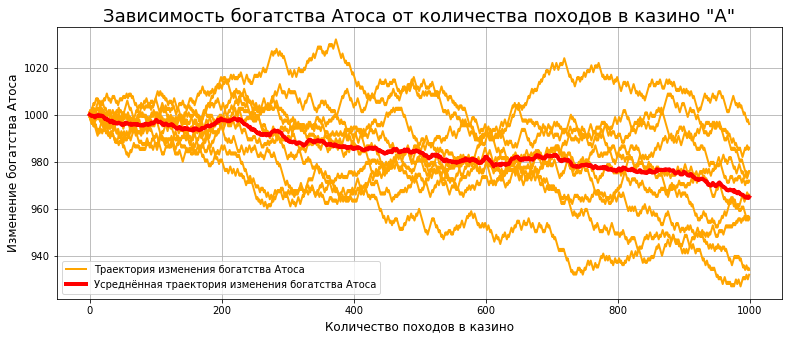

In [17]:
np.random.seed(123456789)
wealth = []
for j in range(10):
    francs = 1000
    francs_n = []
    for i in range(1000):
        o = np.random.choice([1, -1], p = [0.49,0.51])
        francs +=o
        francs_n.append(francs)
    wealth.append(francs_n)   
plt.figure(figsize=(13,5))
plt.plot(wealth[0],label = 'Траектория изменения богатства Атоса',color='orange',linewidth = 2)
for l in range(1,10):
    plt.plot(wealth[l],color='orange',linewidth = 2)
    
average_wealth = np.mean(wealth,axis=0)
plt.plot(average_wealth, label = 'Усреднённая траектория изменения богатства Атоса',color='red', linewidth=4)
plt.grid(True)
plt.xlabel('Количество походов в казино',fontsize =12)
plt.ylabel('Изменение богатства Атоса', fontsize =12)
plt.title('Зависимость богатства Атоса от количества походов в казино "А"', fontsize = 18)
plt.legend(loc = 'lower left')

#### ***Исходя из графика, мы можем заметить, что состояние богатства Атоса и количество походов в казино "А" находятся в обратной зависимости. То есть, чем больше походов в казино совершил Атос, тем меньше стало его богатство. Это подтверждает убывающая усреднённая траектория изменения богатства Атоса.***

### Пункт б

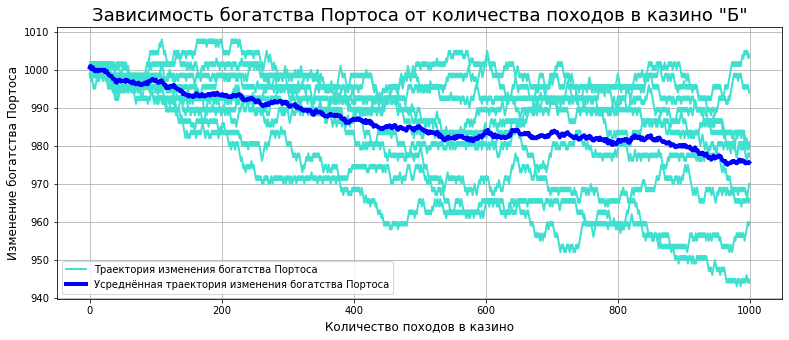

In [18]:
np.random.seed(123456789)
money = []
for el in range(10):
    franc = 1000
    franc_n = []
    for m in range(1000):
        if franc%3 == 0:
            k = np.random.choice([1, -1], p = [0.09,0.91])
            franc +=k
            franc_n.append(franc)
        elif franc%3 != 0:
            k = np.random.choice([1, -1], p = [0.74,0.26])
            franc +=k
            franc_n.append(franc)           
    money.append(franc_n)   
plt.figure(figsize=(13,5))
plt.plot(money[0],label = 'Траектория изменения богатства Портоса',color='turquoise',linewidth = 2)
for q in range(1,10):
    plt.plot(money[q],color='turquoise',linewidth = 2)
    
average_money = np.mean(money,axis=0)
plt.plot(average_money, label = 'Усреднённая траектория изменения богатства Портоса',color='blue', linewidth=4)
plt.grid(True)
plt.xlabel('Количество походов в казино',fontsize =12)
plt.ylabel('Изменение богатства Портоса', fontsize =12)
plt.title('Зависимость богатства Портоса от количества походов в казино "Б"', fontsize = 18)
plt.legend(loc = 'lower left')

#### ***Исходя из графика, мы можем заметить, что состояние богатства Портоса и количество походов в казино "Б" находятся в обратной зависимости. То есть, чем больше походов в казино совершил Портос, тем меньше стало его богатство. Это подтверждает убывающая усреднённая траектория изменения богатства Портоса.***

### Пункт в

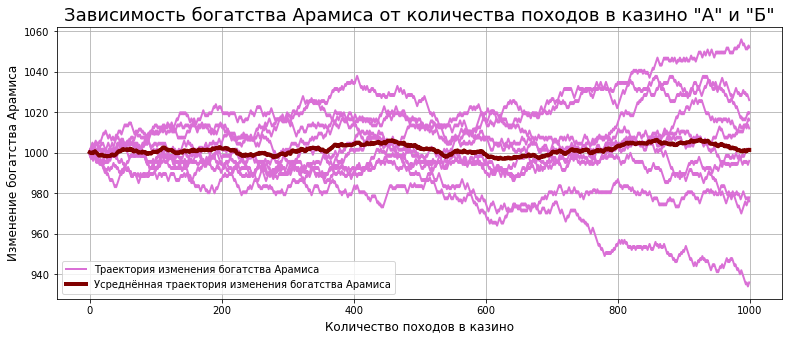

In [19]:
np.random.seed(123456789)
bog = []
for p in range(10):
    babki = 1000
    babki_n = []
    for c in range(1000):
        casino = np.random.choice([0,1],p=[0.5,0.5])
        if casino == 0:
            bb = np.random.choice([1, -1], p = [0.49,0.51])
            babki +=bb
            babki_n.append(babki)
        elif casino == 1:
            if babki %3 == 0:
                ab = np.random.choice([1, -1], p = [0.09,0.91])
                babki +=ab
                babki_n.append(babki)
            elif babki%3 != 0:
                ab = np.random.choice([1, -1], p = [0.74,0.26])
                babki +=ab
                babki_n.append(babki) 
    bog.append(babki_n)   
plt.figure(figsize=(13,5))
plt.plot(bog[0],label = 'Траектория изменения богатства Арамиса',color='orchid',linewidth = 2)
for e in range(1,10):
    plt.plot(bog[e],color='orchid',linewidth = 2)
    
average_bog = np.mean(bog,axis=0)
plt.plot(average_bog, label = 'Усреднённая траектория изменения богатства Арамиса',color='maroon', linewidth=4)
plt.grid(True)
plt.xlabel('Количество походов в казино',fontsize =12)
plt.ylabel('Изменение богатства Арамиса', fontsize =12)
plt.title('Зависимость богатства Арамиса от количества походов в казино "А" и "Б"', fontsize = 18)
plt.legend(loc = 'lower left')

#### ***Исходя из графика, мы можем сделать вывод о том, что стратегия Арамиса ходить в казино "А" и в казино "Б" является самой выигрышной, поскольку в сравнении с Атосом и Портосом его усреднённая траектория изменения богатства не убывает***

### Задача 3 (Парадокс Берксона)

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются 
нормальным распределением с ожиданием 60 и стандартным отклонением 10. 

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более $n$ баллов в сумме по русскому и математике. 

Для каждого $n$ от $80$ до $160$ с шагом $5$ случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.


__а) [5 баллов]__ Постройте график числа прошедших в УШЭ в зависимости от $n$. 

__б) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди прошедших в УШЭ.

__в) [5 баллов]__ Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от $n$ среди не прошедших в УШЭ.

### Пункт а

In [20]:
np.random.seed(123456789)
for_grafik = []
for el in range(80,161,5):
    russkiy = stats.norm(60,10)
    matesha = stats.norm(60,10)
    adin = russkiy.rvs(10000)
    dva = matesha.rvs(10000)
    summa_ballov = adin+dva
    proshli = 0
    ne_proshli = 0
    random.seed(123456789)
    for i in summa_ballov:
        if i>=el:
            proshli += 1
        elif i<el:
            ne_proshli +=1
    for_grafik.append(proshli)
    print(f"Для n = {el}: поступило - {proshli} человек(а),не поступило - {ne_proshli} человек(а)" )

Для n = 80: поступило - 9985 человек(а),не поступило - 15 человек(а)
Для n = 85: поступило - 9925 человек(а),не поступило - 75 человек(а)
Для n = 90: поступило - 9820 человек(а),не поступило - 180 человек(а)
Для n = 95: поступило - 9640 человек(а),не поступило - 360 человек(а)
Для n = 100: поступило - 9205 человек(а),не поступило - 795 человек(а)
Для n = 105: поступило - 8500 человек(а),не поступило - 1500 человек(а)
Для n = 110: поступило - 7596 человек(а),не поступило - 2404 человек(а)
Для n = 115: поступило - 6440 человек(а),не поступило - 3560 человек(а)
Для n = 120: поступило - 5010 человек(а),не поступило - 4990 человек(а)
Для n = 125: поступило - 3529 человек(а),не поступило - 6471 человек(а)
Для n = 130: поступило - 2441 человек(а),не поступило - 7559 человек(а)
Для n = 135: поступило - 1425 человек(а),не поступило - 8575 человек(а)
Для n = 140: поступило - 730 человек(а),не поступило - 9270 человек(а)
Для n = 145: поступило - 360 человек(а),не поступило - 9640 человек(а)
Для n

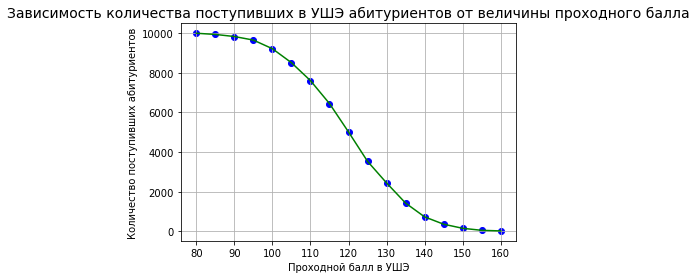

In [21]:
prohodnoi = np.linspace(80,160,17)
plt.plot(prohodnoi,for_grafik,color = 'green')
plt.grid(True)
plt.xlabel('Проходной балл в УШЭ',fontsize=10)
plt.ylabel('Количество поступивших абитуриентов',fontsize=10)
plt.title('Зависимость количества поступивших в УШЭ абитуриентов от величины проходного балла',fontsize = 14)
plt.scatter(prohodnoi,for_grafik,color = 'blue')

#### ***Исходя из графика, мы можем сделать вывод о том, что чем больше проходной балл в УШЭ, тем меньше поступивших абитуриентов***

### Пункт б

In [22]:
np.random.seed(123456789)
for_gr = []
for el in range(80,161,5):
    russkiy = stats.norm(60,10)
    matesha = stats.norm(60,10)
    adin = russkiy.rvs(10000)
    dva = matesha.rvs(10000)
    summa_ballov = adin+dva
    for i in summa_ballov:
        if i>=el:
            r_xy = np.corrcoef(adin[summa_ballov>=el],dva[summa_ballov>=el])[0][1]
    for_gr.append(r_xy)
    print(f"Для n = {el}:коэффициент корреляции матана и русского {r_xy}" )

Для n = 80:коэффициент корреляции матана и русского -0.00858180641165517
Для n = 85:коэффициент корреляции матана и русского -0.012740240703555932
Для n = 90:коэффициент корреляции матана и русского -0.07094228508987427
Для n = 95:коэффициент корреляции матана и русского -0.0901286853449751
Для n = 100:коэффициент корреляции матана и русского -0.13970637719459633
Для n = 105:коэффициент корреляции матана и русского -0.21054457493546333
Для n = 110:коэффициент корреляции матана и русского -0.288526295876694
Для n = 115:коэффициент корреляции матана и русского -0.37352052131669133
Для n = 120:коэффициент корреляции матана и русского -0.44402626330634015
Для n = 125:коэффициент корреляции матана и русского -0.5620250857504311
Для n = 130:коэффициент корреляции матана и русского -0.6254525459248772
Для n = 135:коэффициент корреляции матана и русского -0.6740271355025277
Для n = 140:коэффициент корреляции матана и русского -0.750208705298893
Для n = 145:коэффициент корреляции матана и русск

Text(0.5, 1.0, 'Корреляционная зависимость баллов по русскому и по математике \n среди поступивших в УШЭ абитуриентов \n в зависимости от величины проходного балла')

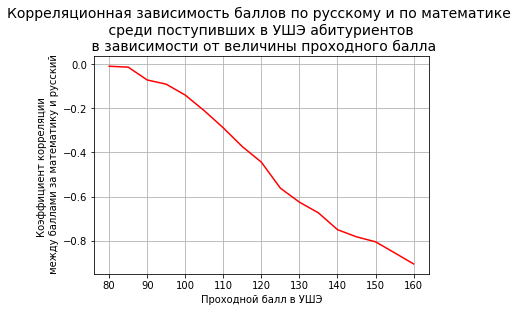

In [23]:
elem = np.linspace(80,160,17)
plt.plot(elem,for_gr,color = 'red')
plt.grid(True)
plt.xlabel('Проходной балл в УШЭ',fontsize=10)
plt.ylabel('Коэффициент корреляции \n между баллами за математику и русский',fontsize=10)
plt.title('Корреляционная зависимость баллов по русскому и по математике \n среди поступивших в УШЭ абитуриентов \n в зависимости от величины проходного балла',fontsize = 14)

#### ***Исходя из графика мы можем заметить, что чем выше проходной балл, тем слабее зависимость между результатами по математике и русскому, среди поступивших в УШЭ. Именно это и объясняется парадоксом Берксона***

### Пункт в

In [24]:
np.random.seed(123456789)
final = []
for el in range(80,161,5):
    russkiy = stats.norm(60,10)
    matesha = stats.norm(60,10)
    adin = russkiy.rvs(10000)
    dva = matesha.rvs(10000)
    summa_ballov = adin+dva
    for i in summa_ballov:
        if i<el:
            r = np.corrcoef(adin[summa_ballov<el],dva[summa_ballov<el])[0][1]
    final.append(r)
    print(f"Для n = {el}:коэффициент корреляции матана и русского {r}" )

Для n = 80:коэффициент корреляции матана и русского -0.9627475930844808
Для n = 85:коэффициент корреляции матана и русского -0.9206888373437762
Для n = 90:коэффициент корреляции матана и русского -0.8390154751503947
Для n = 95:коэффициент корреляции матана и русского -0.7585140615113894
Для n = 100:коэффициент корреляции матана и русского -0.7149356791208301
Для n = 105:коэффициент корреляции матана и русского -0.6842094910632067
Для n = 110:коэффициент корреляции матана и русского -0.6042909357490447
Для n = 115:коэффициент корреляции матана и русского -0.5464177218658405
Для n = 120:коэффициент корреляции матана и русского -0.45786676068433985
Для n = 125:коэффициент корреляции матана и русского -0.35857511472423576
Для n = 130:коэффициент корреляции матана и русского -0.3160979965078091
Для n = 135:коэффициент корреляции матана и русского -0.2081095726894267
Для n = 140:коэффициент корреляции матана и русского -0.1368874949586338
Для n = 145:коэффициент корреляции матана и русского 

Text(0.5, 1.0, 'Корреляционная зависимость баллов по русскому и по математике \n среди непоступивших в УШЭ абитуриентов \n в зависимости от величины проходного балла')

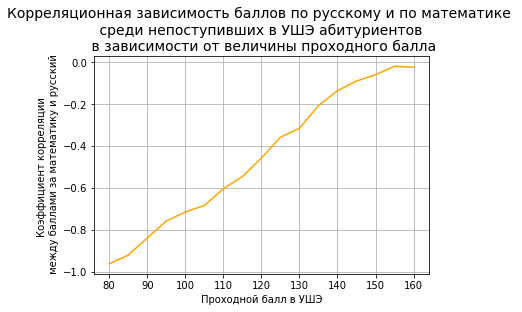

In [25]:
itog = np.linspace(80,160,17)
plt.plot(itog,final,color = 'orange')
plt.grid(True)
plt.xlabel('Проходной балл в УШЭ',fontsize=10)
plt.ylabel('Коэффициент корреляции \n между баллами за математику и русский',fontsize=10)
plt.title('Корреляционная зависимость баллов по русскому и по математике \n среди непоступивших в УШЭ абитуриентов \n в зависимости от величины проходного балла',fontsize = 14)

#### ***Исходя из графика мы можем заметить, что чем выше проходной балл, тем сильнее зависимость между результатами по математике и русскому, среди не поступивших в УШЭ, что тоже объясняется парадоксом Берксона***